In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.1 MB/s eta 0:00:00


In [3]:
import os
import glob
import random
import numpy as np
import pandas as pd

import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
!unzip /content/drive/MyDrive/HAR.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: Human Action Recognition/train/Image_5499.jpg  
  inflating: Human Action Recognition/train/Image_55.jpg  
  inflating: Human Action Recognition/train/Image_550.jpg  
  inflating: Human Action Recognition/train/Image_5500.jpg  
  inflating: Human Action Recognition/train/Image_5501.jpg  
  inflating: Human Action Recognition/train/Image_5502.jpg  
  inflating: Human Action Recognition/train/Image_5503.jpg  
  inflating: Human Action Recognition/train/Image_5504.jpg  
  inflating: Human Action Recognition/train/Image_5505.jpg  
  inflating: Human Action Recognition/train/Image_5506.jpg  
  inflating: Human Action Recognition/train/Image_5507.jpg  
  inflating: Human Action Recognition/train/Image_5508.jpg  
  inflating: Human Action Recognition/train/Image_5509.jpg  
  inflating: Human Action Recognition/train/Image_551.jpg  
  inflating: Human Action Recognition/train/Image_5510.jpg  
  inflating: Human Action Recogn

In [5]:
train_csv = pd.read_csv("/content/Human Action Recognition/Training_set.csv")
test_csv = pd.read_csv("/content/Human Action Recognition/Testing_set.csv")

In [6]:
train_fol = glob.glob("/content/Human Action Recognition/train/*")
test_fol = glob.glob("/content/Human Action Recognition/test/*")

In [7]:
train_csv.label.value_counts()

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

In [8]:
train_csv

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [9]:
filename = train_csv['filename']
situation = train_csv['label']

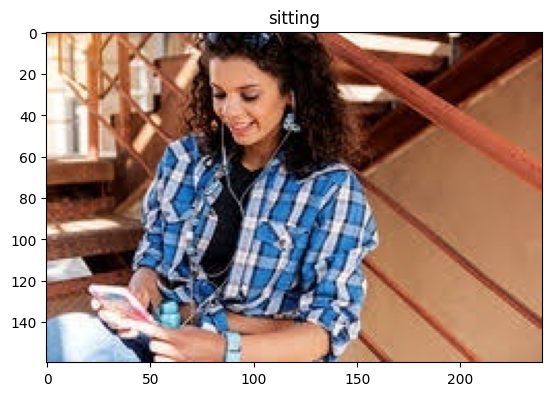

In [11]:
imgg = "Image_{}.jpg".format(1)
train = "/content/Human Action Recognition/train/"
testImage = img.imread(train + imgg)
plt.imshow(testImage)
plt.title("{}".format(train_csv.loc[train_csv['filename'] == "{}".format(imgg), 'label'].item()))
plt.show()

#  **Pre Processing**

In [12]:
img_data = []
img_label = []
length = len(train_fol)
for i in (range(len(train_fol)-1)):
    t = '/content/Human Action Recognition/train/' + filename[i]
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(situation[i])

In [13]:
inp_shape = (160, 160,3)

In [14]:
arr = img_data
arr = np.asarray(arr)
type(arr)

numpy.ndarray

In [15]:
y_train = to_categorical(np.asarray(train_csv['label'].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(15, activation='softmax'))

58889256/58889256 [==============================] - 0s 0us/step


In [17]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 14985039 (57.16 MB)
Trainable params: 270351 (1.03 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [19]:
history = vgg_model.fit(arr,y_train, epochs=50)

Epoch 1/50
394/394 [==============================] - 38s 69ms/step - loss: 2.2030 - accuracy: 0.4513
Epoch 2/50
394/394 [==============================] - 26s 65ms/step - loss: 1.2055 - accuracy: 0.6153
Epoch 3/50
394/394 [==============================] - 26s 67ms/step - loss: 0.9408 - accuracy: 0.6917
Epoch 4/50
394/394 [==============================] - 27s 68ms/step - loss: 0.7293 - accuracy: 0.7588
Epoch 5/50
394/394 [==============================] - 28s 70ms/step - loss: 0.5443 - accuracy: 0.8192
Epoch 6/50
394/394 [==============================] - 27s 69ms/step - loss: 0.3938 - accuracy: 0.8691
Epoch 7/50
394/394 [==============================] - 27s 69ms/step - loss: 0.2931 - accuracy: 0.9059
Epoch 8/50
394/394 [==============================] - 27s 70ms/step - loss: 0.2065 - accuracy: 0.9337
Epoch 9/50
394/394 [==============================] - 27s 69ms/step - loss: 0.1586 - accuracy: 0.9499
Epoch 10/50
394/394 [==============================] - 27s 70ms/step - loss: 0.171

In [20]:
vgg_model.save_weights("model.h5")

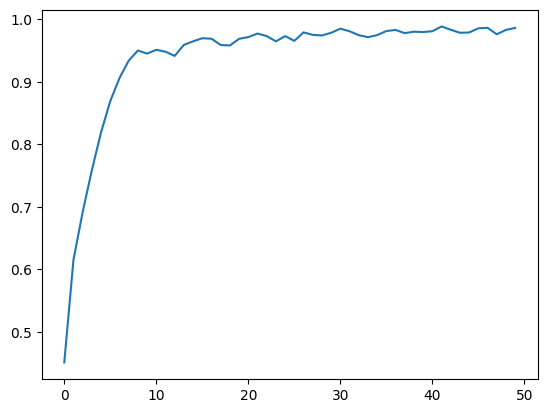

In [21]:
accurate = history.history['accuracy']
plt.plot(accurate)

# **Inference Pipeline**

In [22]:
def test_predict(test_image):
    situation=["sitting","using_laptop","hugging","sleeping","drinking",
           "clapping","dancing","cycling","calling","laughing"
          ,"eating","fighting","listening_to_music","running","texting"]
    image = Image.open(test_image)
    input_img = np.asarray(image.resize((160,160)))
    result = vgg_model.predict(np.asarray([input_img]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", situation[prediction])

    image = img.imread(test_image)
    plt.imshow(image)


1/1 [==============================] - 0s 19ms/step
probability: 99.24396276473999%
Predicted class :  running


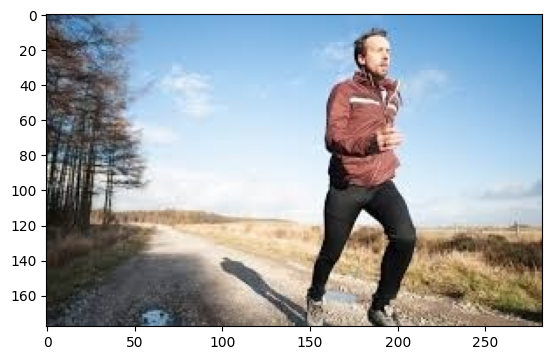

In [25]:
test_predict('/content/Human Action Recognition/test/Image_100.jpg')